# Exploring the movies dataset

## Loading the dataset

In [1]:
import os

import pandas as pd
import sklearn as skl

import holcrawl.shared

In [2]:
dataset_dir = holcrawl.shared._get_dataset_dir_path()

In [3]:
dataset_path = os.path.join(dataset_dir, 'movies_dataset.csv')

In [4]:
df = pd.read_csv(dataset_path)

In [5]:
df.year.value_counts()

2009.0    163
2011.0    152
2012.0    148
2014.0    129
2013.0    122
2010.0    105
2015.0     67
2008.0     14
Name: year, dtype: int64

In [6]:
list(df.columns)

['avg_screens',
 'budget',
 'budget_currency',
 'closing_date',
 'critic_review_count',
 'duration',
 'gross_income',
 'imdb_user_reviews',
 'max_screens',
 'mc_avg_user_score',
 'mc_metascore',
 'mc_mixed_rating_frequency',
 'mc_movie_name',
 'mc_negative_rating_frequency',
 'mc_positive_rating_frequency',
 'mc_pro_critic_reviews',
 'mc_user_reviews',
 'metascore',
 'name',
 'num_weekends',
 'opening_weekend_date',
 'opening_weekend_income',
 'opening_weekend_income_currency',
 'opening_weekend_screens',
 'rating',
 'rating_count',
 'release_day',
 'release_month',
 'release_year',
 'screens_by_weekend',
 'total_screens',
 'user_review_count',
 'year',
 'avg_rating_per_demo.aged_18-29',
 'avg_rating_per_demo.aged_30-44',
 'avg_rating_per_demo.aged_45+',
 'avg_rating_per_demo.aged_under_18',
 'avg_rating_per_demo.females',
 'avg_rating_per_demo.females_aged_18-29',
 'avg_rating_per_demo.females_aged_30-44',
 'avg_rating_per_demo.females_aged_45+',
 'avg_rating_per_demo.females_under_18

## Feature Generation

In [8]:
df['norm_gross'] = df['gross_income'] / df['budget']

In [9]:
df['profit'] = df['gross_income'] - df['budget']

In [10]:
df['ROI'] = (df['gross_income'] - df['budget']) / df['budget']

In [11]:
df['name_length'] = df['name'].map(lambda name: len(name))

In [12]:
len(df)

900

In [13]:
df.isnull().sum()

avg_screens                          0
budget                             149
budget_currency                    149
closing_date                         0
critic_review_count                  0
duration                             0
gross_income                         0
imdb_user_reviews                    0
max_screens                          0
mc_avg_user_score                    0
mc_metascore                         0
mc_mixed_rating_frequency            0
mc_movie_name                        0
mc_negative_rating_frequency         0
mc_positive_rating_frequency         0
mc_pro_critic_reviews                0
mc_user_reviews                      0
metascore                            3
name                                 0
num_weekends                         0
opening_weekend_date                 0
opening_weekend_income               0
opening_weekend_income_currency      0
opening_weekend_screens              0
rating                               0
rating_count             

In [14]:
len(df[df['avg_mc_critic_by_opening'].notnull()])

634

In [15]:
# df['opening_weekend_date']

In [16]:
BASE_FEAT_TO_KEEP = [
    'duration', 'budget', 'opening_month', 'opening_day', 'opening_day_of_year', 'year',
    'avg_mc_critic_by_opening', 'num_mc_critic_by_opening', 'name_length', 
    'num_imdb_user_by_opening', 'avg_imdb_user_by_opening', 'opening_weekend_screens'# 'avg_mc_user_by_opening'
]

In [17]:
FEAT_TO_KEEP = BASE_FEAT_TO_KEEP + [col for col in df.columns if 'genres' in col]

In [18]:
features = df.drop([col for col in df.columns if col not in BASE_FEAT_TO_KEEP], axis=1)

In [19]:
dataset = df.drop([col for col in df.columns if col not in FEAT_TO_KEEP], axis=1)

In [20]:
# letter_dummies = pd.get_dummies(df['starting_letter'], drop_first=True, prefix='fl')

In [21]:
# dataset = dataset.assign(**{col: letter_dummies[col] for col in letter_dummies.columns})

In [22]:
dataset = dataset.dropna(axis=0)

In [23]:
len(dataset)

518

In [24]:
import seaborn as sns
%matplotlib inline

In [25]:
dataset.year.unique()

array([ 2014.,  2012.,  2013.,  2011.,  2015.,  2010.])

In [26]:
dataset.year.value_counts()

2011.0    119
2012.0    117
2014.0    106
2013.0     94
2015.0     63
2010.0     19
Name: year, dtype: int64

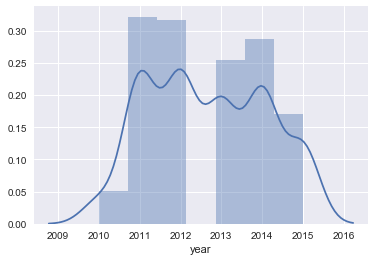

In [27]:
sns.distplot(dataset.year)

In [28]:
dataset.columns

Index(['budget', 'duration', 'opening_weekend_screens', 'year',
       'genres.action', 'genres.adventure', 'genres.animation',
       'genres.biography', 'genres.comedy', 'genres.crime',
       'genres.documentary', 'genres.drama', 'genres.family', 'genres.fantasy',
       'genres.history', 'genres.horror', 'genres.music', 'genres.musical',
       'genres.mystery', 'genres.news', 'genres.romance', 'genres.sci-fi',
       'genres.sport', 'genres.thriller', 'genres.war', 'genres.western',
       'num_mc_critic_by_opening', 'avg_mc_critic_by_opening',
       'num_imdb_user_by_opening', 'avg_imdb_user_by_opening', 'opening_month',
       'opening_day', 'opening_day_of_year', 'name_length'],
      dtype='object')

In [29]:
# pd.options.display.max_columns = 999
# dataset

## Exploration

In [30]:
import numpy as np

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def draw_pearson_correlation(feature_df):
    pearson_df = pd.DataFrame(
        data=np.corrcoef(feature_df.T),
        index=feature_df.columns,
        columns=feature_df.columns
    )
    
    lower_left_mask = []
    for i in range(len(feature_df.columns)):
        lower_left_mask.append([i<j+1 for j in range(len(feature_df.columns))])
    lower_left_mask = np.array(lower_left_mask)
    
    plt.figure(figsize=(13,10))
    with sns.axes_style("white"):
        heatmap = sns.heatmap(
            pearson_df, 
            annot=True, 
            fmt=".2f", 
            linewidths=.5,
#             mask=lower_left_mask
        )
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize=14);
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
        

In [33]:
features_for_pearson = features

In [34]:
features_for_pearson['ROI'] = df.ix[features_for_pearson.index]['ROI']

In [35]:
features_for_pearson['gross_income'] = df.ix[features_for_pearson.index]['gross_income']

In [36]:
features_for_pearson = features_for_pearson.dropna(axis=0)

In [37]:
features_for_pearson.columns

Index(['budget', 'duration', 'opening_weekend_screens', 'year',
       'num_mc_critic_by_opening', 'avg_mc_critic_by_opening',
       'num_imdb_user_by_opening', 'avg_imdb_user_by_opening', 'opening_month',
       'opening_day', 'opening_day_of_year', 'name_length', 'ROI',
       'gross_income'],
      dtype='object')

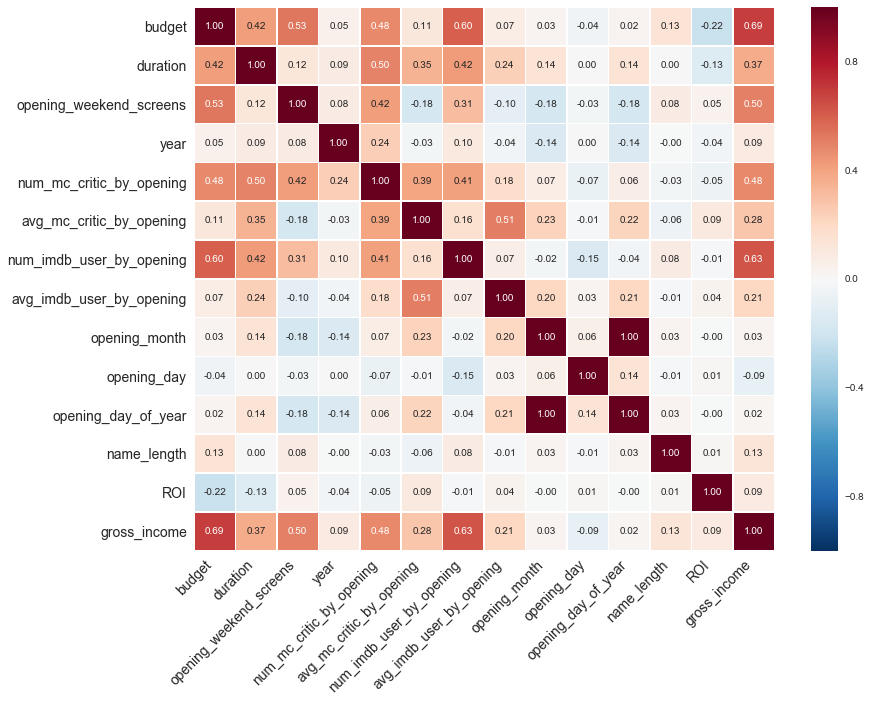

In [38]:
draw_pearson_correlation(features_for_pearson)

In [39]:
pd.options.display.max_rows = 155
df[df['genres.action'] == 1][['budget', 'gross_income', 'name']]

,budget,gross_income,name
1,22000000.0,12232937.0,12 Rounds
4,200000000.0,166112167.0,2012
5,42000000.0,138447667.0,21 Jump Street
6,50000000.0,191616238.0,22 Jump Street
8,61000000.0,75573300.0,2 Guns
9,110000000.0,106369117.0,300: Rise of an Empire
10,28000000.0,37053924.0,30 Minutes or Less
11,28000000.0,30688364.0,3 Days to Kill
13,175000000.0,38297305.0,47 Ronin
15,30000000.0,31743332.0,9


In [40]:
list(df.columns)

['avg_screens',
 'budget',
 'budget_currency',
 'closing_date',
 'critic_review_count',
 'duration',
 'gross_income',
 'imdb_user_reviews',
 'max_screens',
 'mc_avg_user_score',
 'mc_metascore',
 'mc_mixed_rating_frequency',
 'mc_movie_name',
 'mc_negative_rating_frequency',
 'mc_positive_rating_frequency',
 'mc_pro_critic_reviews',
 'mc_user_reviews',
 'metascore',
 'name',
 'num_weekends',
 'opening_weekend_date',
 'opening_weekend_income',
 'opening_weekend_income_currency',
 'opening_weekend_screens',
 'rating',
 'rating_count',
 'release_day',
 'release_month',
 'release_year',
 'screens_by_weekend',
 'total_screens',
 'user_review_count',
 'year',
 'avg_rating_per_demo.aged_18-29',
 'avg_rating_per_demo.aged_30-44',
 'avg_rating_per_demo.aged_45+',
 'avg_rating_per_demo.aged_under_18',
 'avg_rating_per_demo.females',
 'avg_rating_per_demo.females_aged_18-29',
 'avg_rating_per_demo.females_aged_30-44',
 'avg_rating_per_demo.females_aged_45+',
 'avg_rating_per_demo.females_under_18

In [41]:
GENRES_COLS = [col for col in df.columns if 'genres' in col]

In [42]:
def _average_col_by_budget(df, colnames, norm_factor=1, labels=None, figsize=None):
    coldf = pd.DataFrame(
        data=np.array([
            [
                (np.mean(df[df[genre] == 1][colname]) / norm_factor) for genre in GENRES_COLS
            ] for colname in colnames
        ]).transpose(), 
        index=[col[col.rfind('.')+1:] for col in GENRES_COLS], 
        columns=(labels or colnames)
    )
    ax = coldf.plot(kind='bar', figsize=(figsize or (15, 10)), legend=True, fontsize=13)
    plt.xticks(rotation=45, ha='right')
    plt.title("Average {} by genre".format(', '.join(labels or colnames)), fontsize=16)
    plt.legend(prop={'size':14})

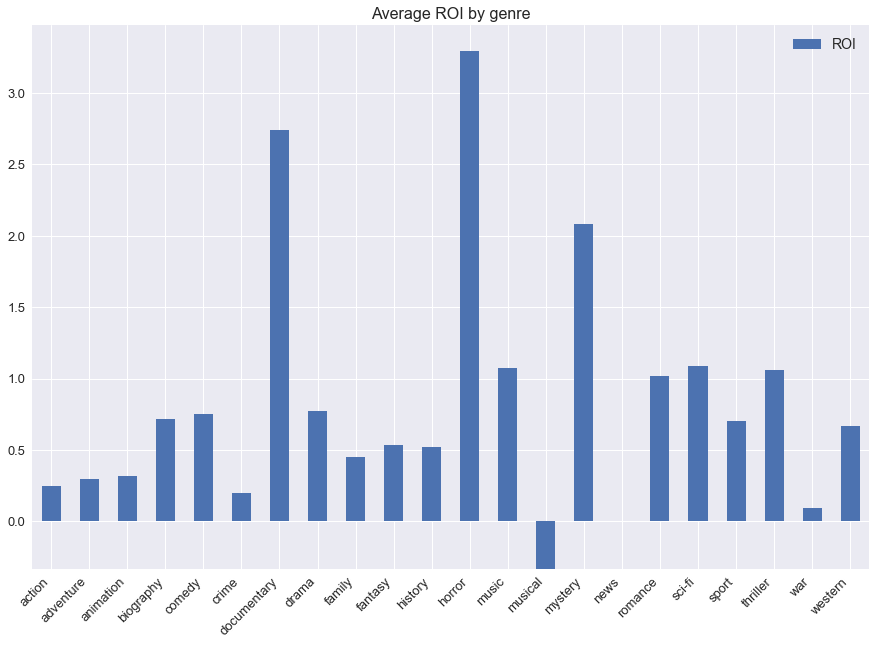

In [43]:
_average_col_by_budget(df, ['ROI'])

In [44]:
len(df[df['genres.documentary'] == 1])

37

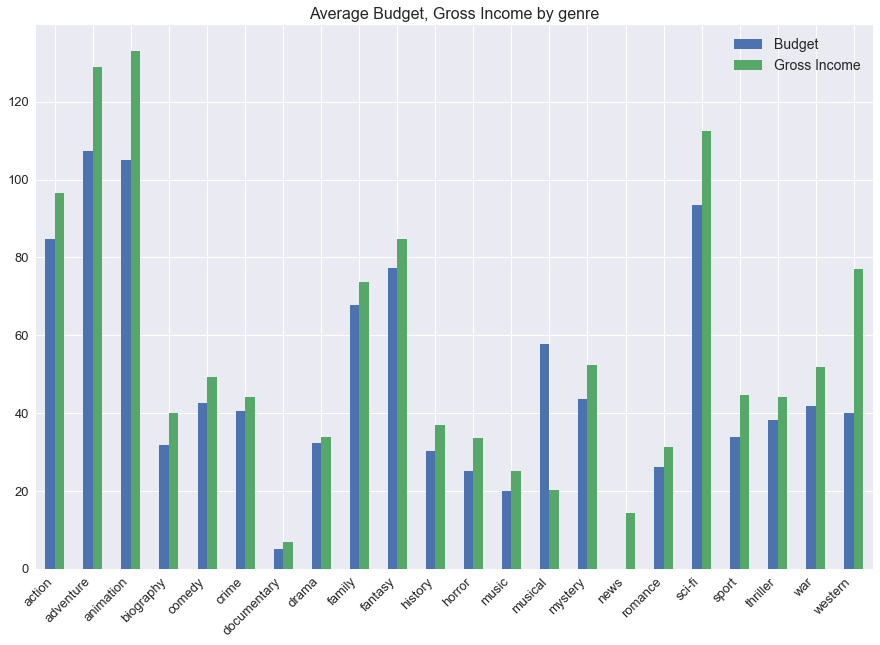

In [45]:
_average_col_by_budget(df, ['budget', 'gross_income'], norm_factor=1000000, labels=['Budget', 'Gross Income'])

In [46]:
df['mc_avg_user_score_scaled'] = df['mc_avg_user_score'] * 10
df['rating_scaled'] = df['rating'] * 10

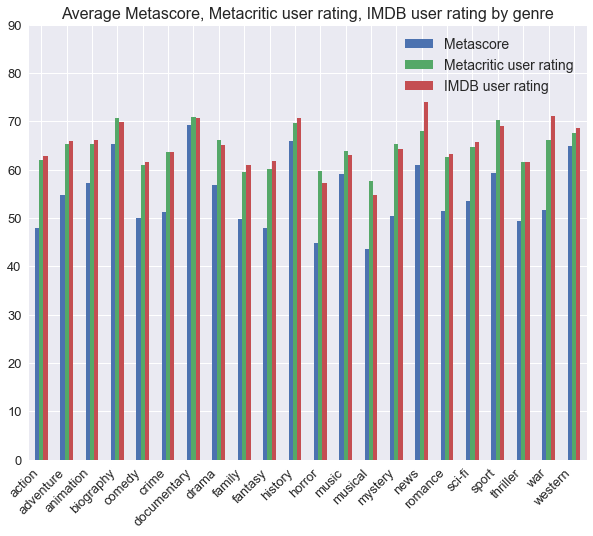

In [47]:
_average_col_by_budget(df, ['metascore', 'mc_avg_user_score_scaled','rating_scaled'], figsize=(10,8),
                      labels=['Metascore', 'Metacritic user rating', 'IMDB user rating'])
plt.ylim(0, 90);

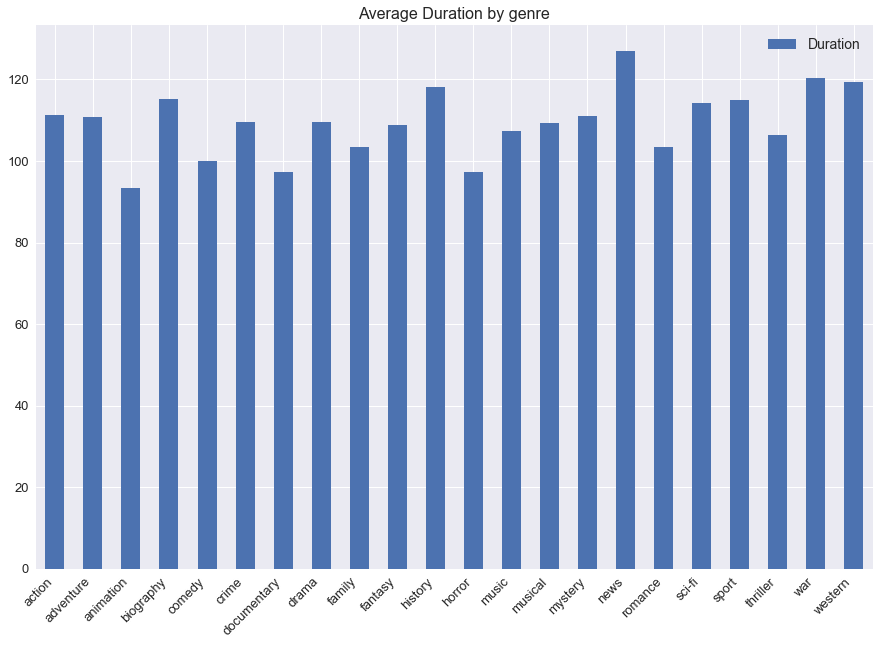

In [48]:
_average_col_by_budget(df, ['duration'], labels=['Duration'])

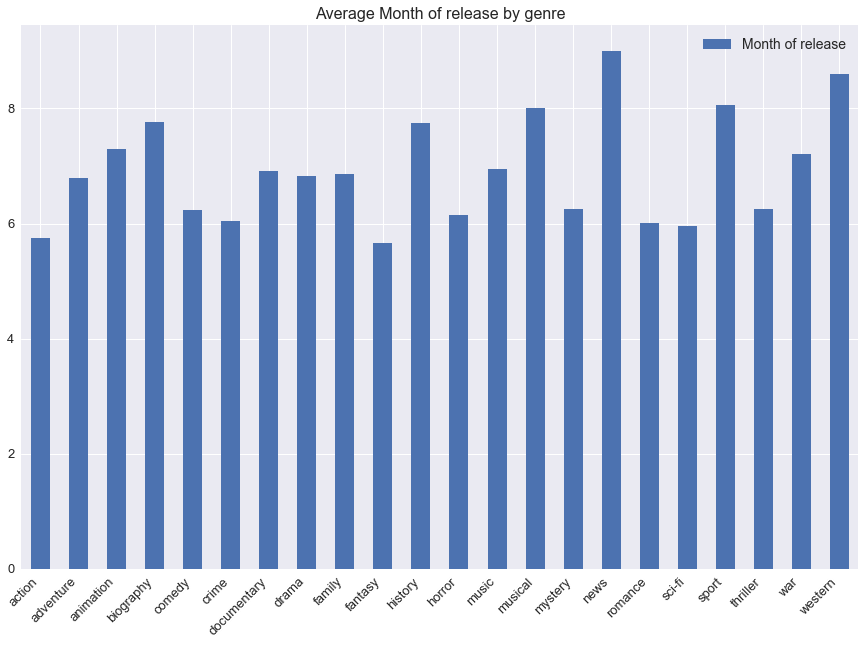

In [49]:
_average_col_by_budget(df, ['opening_month'], labels=['Month of release'])

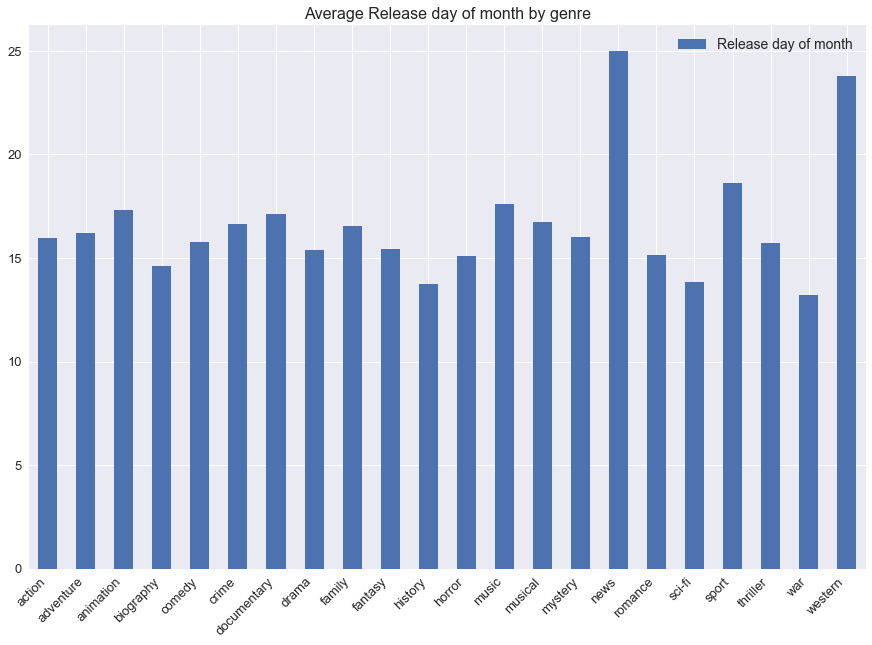

In [50]:
_average_col_by_budget(df, ['opening_day'], labels=['Release day of month'])

#### IMDB Rating vs Number of rating

In [51]:
np.corrcoef([df.rating, df.rating_count])[0,1]

0.48975375623733669

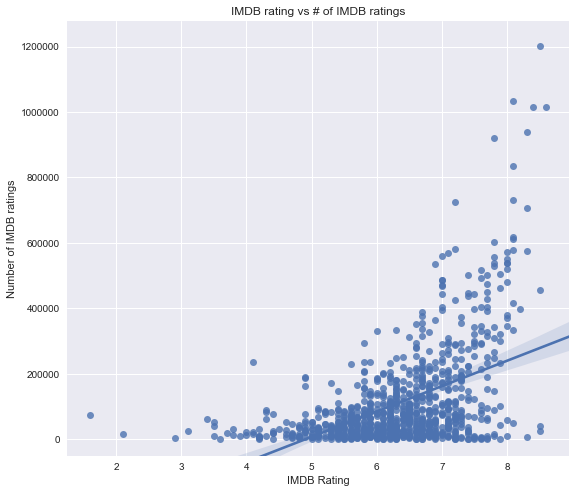

In [52]:
plt.figure(figsize=(9,8))
sns.regplot(x=df.rating, y=df.rating_count)
plt.ylim(-50000, plt.ylim()[1])
# plt.scatter(df.rating , df.rating_count)
plt.xlabel('IMDB Rating')
plt.ylabel('Number of IMDB ratings')
plt.title('IMDB rating vs # of IMDB ratings');

#### Rating by opening vs gross income

In [53]:
np.corrcoef([dataset.avg_imdb_user_by_opening, df.ix[dataset.index].gross_income])[0,1]

0.20553268564903468

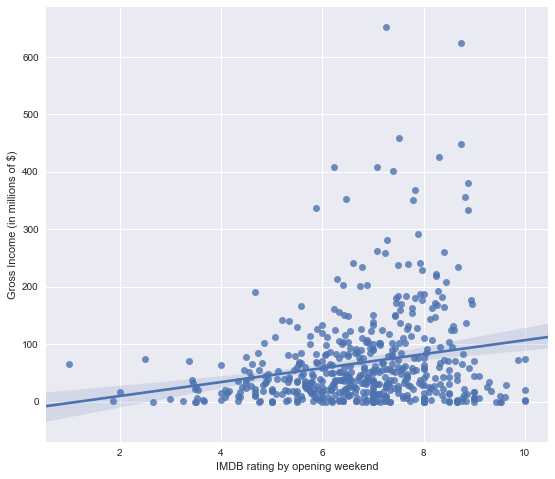

In [54]:
plt.figure(figsize=(9,8))
sns.regplot(x=dataset.avg_imdb_user_by_opening, y=df.ix[dataset.index].gross_income / 1000000)
# plt.ylim(-50000, plt.ylim()[1])
# plt.scatter(df.rating , df.rating_count)
plt.xlabel('IMDB rating by opening weekend')
plt.ylabel('Gross Income (in millions of $)');
# plt.title('IMDB rating by opening weekend');

#### # ratings by opening vs gross income

In [55]:
np.corrcoef([dataset.num_imdb_user_by_opening, df.ix[dataset.index].gross_income])[0,1]

0.62904497701915196

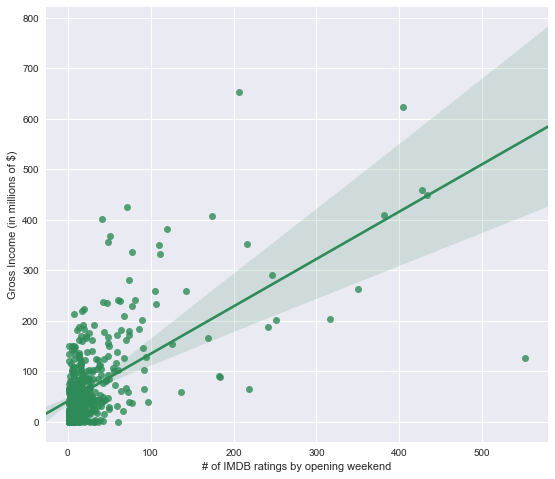

In [56]:
plt.figure(figsize=(9,8))
# sns.regplot(x=dataset.avg_imdb_user_by_opening, y=df.ix[dataset.index].gross_income / 1000000)
sns.regplot(x=dataset.num_imdb_user_by_opening, y=df.ix[dataset.index].gross_income / 1000000, color='seagreen')
# plt.ylim(-50000, plt.ylim()[1])
# plt.scatter(df.rating , df.rating_count)
plt.xlabel('# of IMDB ratings by opening weekend')
plt.ylabel('Gross Income (in millions of $)');
# plt.title('IMDB rating by opening weekend');

#### avg critic ratings by opening vs gross income

In [57]:
np.corrcoef([dataset.avg_mc_critic_by_opening, df.ix[dataset.index].gross_income])[0,1]

0.27594777935823789

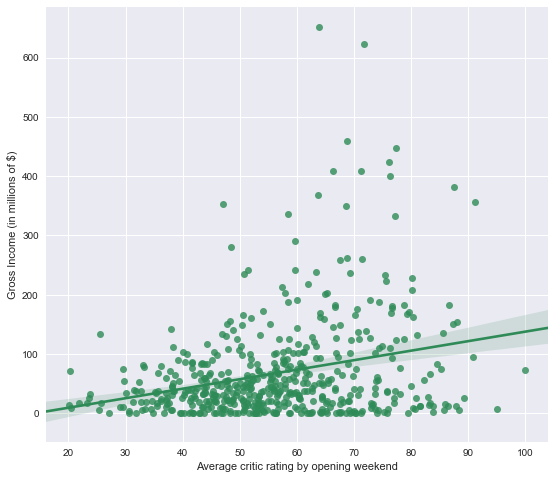

In [58]:
plt.figure(figsize=(9,8))
sns.regplot(x=dataset.avg_mc_critic_by_opening, y=df.ix[dataset.index].gross_income / 1000000, color='seagreen')
plt.xlabel('Average critic rating by opening weekend')
plt.ylabel('Gross Income (in millions of $)');

#### # of critic ratings by opening vs gross income

In [59]:
np.corrcoef([dataset.num_mc_critic_by_opening, df.ix[dataset.index].gross_income])[0,1]

0.48208842445095279

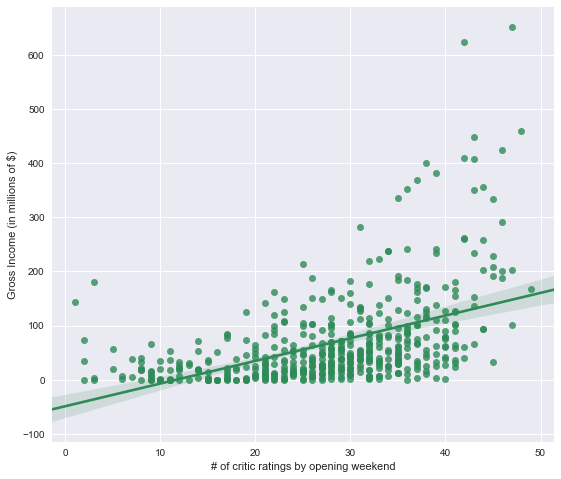

In [60]:
plt.figure(figsize=(9,8))
sns.regplot(x=dataset.num_mc_critic_by_opening, y=df.ix[dataset.index].gross_income / 1000000, color='seagreen')
plt.xlabel('# of critic ratings by opening weekend')
plt.ylabel('Gross Income (in millions of $)');

### Budget vs Gross Income

In [61]:
sub_df = df[~(df.budget.isnull() | df.gross_income.isnull())]

In [62]:
len(sub_df)

751

In [63]:
np.corrcoef([sub_df.budget, sub_df.gross_income])[0,1]

0.70213665758145349

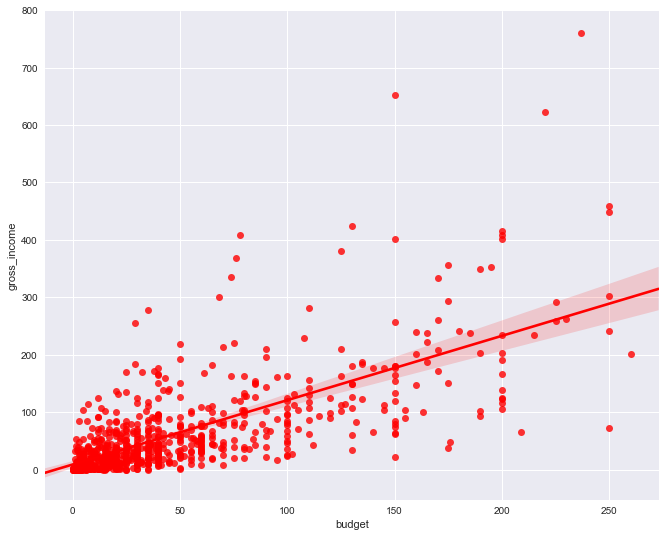

In [64]:
plt.figure(figsize=(11,9))
sns.regplot(x=sub_df.budget / 1000000, y=sub_df.gross_income / 1000000, color='red')

-0.18565967992825205

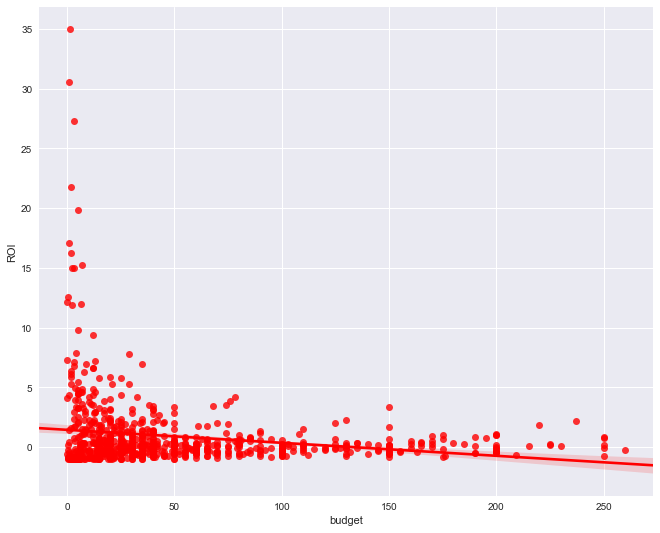

In [65]:
sub_df = df[~(df.budget.isnull() | df.ROI.isnull())]
plt.figure(figsize=(11,9))
sns.regplot(x=sub_df.budget / 1000000, y=sub_df.ROI, color='red')
np.corrcoef([sub_df.budget, sub_df.ROI])[0,1]

### rating and metascoe vs gross

/Users/shaypalachy/miniconda3/envs/ds/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x10ff4e320> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


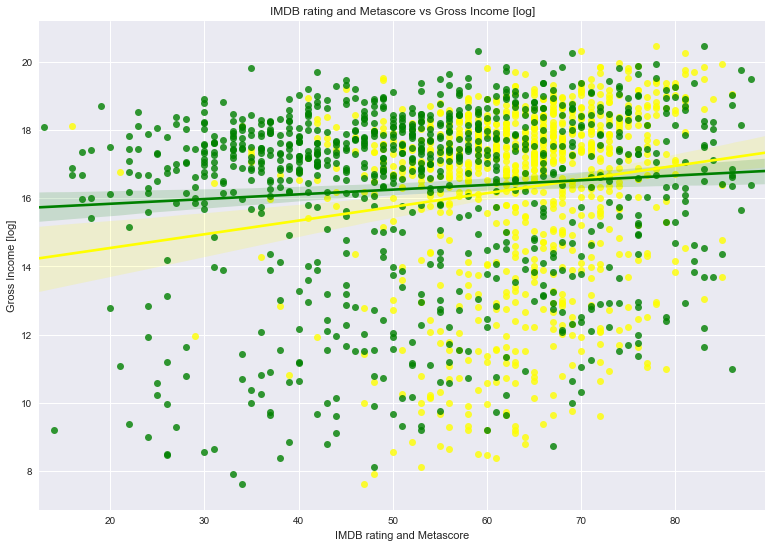

In [66]:
plt.figure(figsize=(13,9))
a = sns.regplot(x=df['rating']*10, y=np.log(df['gross_income']), color='yellow')
b = sns.regplot(x=df['metascore'], y=np.log(df['gross_income']), color='Green')
plt.xlabel('IMDB rating and Metascore')
plt.ylabel('Gross Income [log]')
plt.title('IMDB rating and Metascore vs Gross Income [log]');
plt.legend([a, b], ['IMDB', 'Metascore'],
           loc= 'upper center', fontsize= 'small');